## <font color='blue'> Display Connectivity Matrix for ADHD DataSet</font>
==============================================================

#### This Code is Written by:    Phd Student  <font color=Blue> Dalia A. A. Al-Ubaidi </font> <br> <div class="alert alert-info">University Technology Malaysia, UTM</div> <br> Email: aadalia-1980@graduate.utm.my
***

### for more info, you can check following site:

https://carpentries-incubator.github.io/SDC-BIDS-fMRI/07-functional-connectivity-analysis/index.html

#### and choose the suitable color map (cmap) in the following plot

In [8]:
from nilearn import image as nimg
from nilearn import plotting as nplot
import numpy as np
import pandas as pd
import nibabel as nib

In [9]:
from nilearn import plotting
import numpy as np
import pandas as pd
import nibabel as nib
from nilearn.image import new_img_like
import nilearn.datasets as datasets



#----- function for plotting-------------------
def plotting_image(img,Title):
    plotting.plot_stat_map(
    img, cmap='tab10',
#     bg_img=template,
#     cut_coords=(36, -27, 66),
#     threshold=3,
    title=Title
    )
    plotting.show()
    


def Display_Img_Labels(atlasFile):
    atlas_img=nib.load(atlasFile)
    atlas_data = atlas_img.get_fdata()
    
    atlas_flat = atlas_data.flatten()
    atlas_flat=atlas_flat.astype(int)
    
    uniq_labels=np.unique(atlas_flat)
    index = 0
    if uniq_labels[index]==0:
        uniq_labels = np.delete(uniq_labels, index)
    
    no_of_labels=len(uniq_labels)
    
    print(atlasFile)
    print('no_of_labels=',no_of_labels)
    print('uniqe labels =',uniq_labels)

In [10]:
import numpy as np
from nilearn import datasets

#Load separated parcellation

def Load_Parcle(parcType, RSN_no):
    if parcType=='yeo17':
#         parcel_file ='data4test/Yeo2011_17Networks_N1000.split_components.FSL_MNI152_1mm.nii.gz'
        atlas_yeo_2011=  datasets.fetch_atlas_yeo_2011()
        parcel_file =atlas_yeo_2011['thick_7']
        
        print(parcel_file)
    if parcType=='power':
        parcel_file ='data4test/PowerAtlas_10Networks.nii.gz' #'data4test/power264MNI.nii.gz'
        print(parcel_file)
    if parcType=='shafer':
#         atlas_shafer= datasets.fetch_atlas_schaefer_2018(n_rois=100,yeo_networks=17)
#         parcel_file =atlas_shafer['maps']  #atlas_shafer['labels']
        parcel_file ="data4test/Shafer_17Networks.nii.gz"
        print(parcel_file)
    if parcType=='overlap':
        parcel_file ='data4test/v3_common_ROIs.nii.gz'
        
    if parcType=='hexa' and RSN_no==1:
        parcel_file = "ATLASES/AUN_5ATLASES.nii.gz"
    if parcType=='hexa' and RSN_no==2:    
        parcel_file = "ATLASES/CCN_5ATLASES.nii.gz"
    if parcType=='hexa' and RSN_no==3:
        parcel_file = "ATLASES/DAN_5ATLASES.nii.gz"
    if parcType=='hexa' and RSN_no==4: 
        parcel_file = "ATLASES/DMN_5ATLASES.nii.gz"
    if parcType=='hexa' and RSN_no==5:
        parcel_file = "ATLASES/SMN_5ATLASES.nii.gz"
    if parcType=='hexa' and RSN_no==6:
         parcel_file = "ATLASES/VAN_5ATLASES.nii.gz"
            
    print(parcel_file)
#         parcel_file ="ATLASES/HexaNet_ATLAS.nii.gz"
        
    img=nib.load(parcel_file)
    img_data = img.get_fdata()
    print('The parcel=',parcType ,' its size=', img_data.shape, img.shape)
    
    return img, img_data

def get_atlas_labels(atlas_data):
# Get the label numbers from the atlas
    atlas_labels = np.unique(atlas_data.astype(int))
# Get number of labels that we have
    NUM_LABELS = len(atlas_labels)
    print('no. of labels=',NUM_LABELS, '\nlabels numbers=',atlas_labels)



atlas_img,atlas_data=Load_Parcle('hexa',1)
get_atlas_labels(atlas_data)

# Schaefer2018_100Parcels_17Networks_order_FSLMNI152_1mm.nii.gz

ATLASES/AUN_5ATLASES.nii.gz
The parcel= hexa  its size= (91, 109, 91, 1) (91, 109, 91, 1)
no. of labels= 4 
labels numbers= [0 2 4 5]


In [11]:
from nilearn import maskers
# from nilearn import input_data
from nilearn.maskers import NiftiLabelsMasker 
from nilearn.maskers import NiftiSpheresMasker # 
from nilearn.maskers import NiftiMapsMasker
# nilearn.input_data.NiftiMasker()


def make_Masker(parcle_data):
#     parcle_data = datasets.fetch_atlas_harvard_oxford("cort-maxprob-thr25-2mm") #.maps
#     parcel_file ='data4test/Yeo2011_17Networks_N1000.split_components.FSL_MNI152_1mm.nii.gz'
#     atlas=nib.load(parcle_data)
    parcle_data= parcle_data.get_fdata()

#     print('parcle_data',parcle_data)
    
    
     #standardize=True) #labels=atlas.labels,
        
#     masker = input_data.NiftiLabelsMasker(labels_img=parcle_data,
    masker =NiftiLabelsMasker(parcle_data, standardize=True,
                                      memory='nilearn_cache',
                                      verbose=1,
                                      detrend=True,
                                     low_pass = 0.08,
                                     high_pass = 0.009,
                                     t_r=2)  
    
                                          
    
#     masker =NiftiMasker(parcle_data, standardize=True,
#                                       memory='nilearn_cache',
#                                       verbose=1,
#                                       detrend=True,
#                                      low_pass = 0.08,
#                                      high_pass = 0.009,
#                                      t_r=2)

#     mask_data=parcle_data
#     mask_data = mask_data[:,:,:,n_tr//2].astype(bool)
# #     mask_data = mask_data.astype(bool)
# #     mask_data = mask_data.astype(bool)
#     masker = nib.Nifti1Image(mask_data.astype(img_data_type), affine)
    
#     mask_data = mask_data.astype(bool)

    return (masker)





In [12]:
# Refer to part_06 for code + explanation
def extract_confounds(confound_tsv,confounds,dt=[False]):
    '''
    Arguments:
        confound_tsv                    Full path to confounds.tsv
        confounds                       A list of confounder variables to extract
        dt                              Compute temporal derivatives [default = True]
        
    Outputs:
        confound_mat                    
    '''
    
    if dt:    
        dt_names = ['{}_derivative1'.format(c) for c in confounds]
        confounds = confounds + dt_names
    
    #Load in data using Pandas then extract relevant columns
    confound_df = pd.read_csv(confound_tsv,delimiter='\t') 
    confound_df = confound_df[confounds]
    
 
    #Convert into a matrix of values (timepoints)x(variable)
    confound_mat = confound_df.values 
    
    #Return confound matrix
    return confound_mat

In [13]:
def load_img_cmfd(func_file,confound_file):
    #Load functional image
    tr_drop = 4
#     func_img = nimg.load_img(func_file)
    func_img =nib.load(func_file)

    #Remove the first 4 TRs
    func_img = func_img.slicer[:,:,:,tr_drop:]

    #Use the above function to pull out a confound matrix
    confounds = extract_confounds(confound_file,[])
    #['trans_x','trans_y','trans_z',
    # 'rot_x','rot_y','rot_z',
    # 'global_signal',
    # 'white_matter','csf']
    #Drop the first 4 rows of the confounds matrix
    confounds = confounds[tr_drop:,:] 
    return func_img,confounds

In [14]:

def get_Subject_info(SubID,RequiredInfoList):
    dirName='C:\\Users\\IT-Department\\nilearn_data\\adhd\\'
    fname='ADHD200_40subs_motion_parameters_and_phenotypics2.csv'
    df = pd.read_csv(dirName+fname)
#     print(df)

    for ID, ADHD_Flag in zip(df['Subject'],df['adhd']):
        if(ID==SubID):
            return ADHD_Flag
   
    return -1
    
print(' Sub ADHD=',get_Subject_info(3699991,[]))

 Sub ADHD= 0


In [20]:
#-------------------     Load ADHD Dataset   ----------------------------------
#################################################################################
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from nilearn.connectome import ConnectivityMeasure
from nilearn import maskers #input_data



# # ADHD i f Right-hand
# func_files =["data4test/sub-0010002_ses-1_task-rest_run-1_space-MNI152NLin2009cAsym_desc-preproc_bold.nii.gz"]
# confound_files = ["data4test/sub-0010002_ses-1_task-rest_run-1_desc-confounds_regressors.tsv"]
# ---------------------------------------------------------------
def Get_Corrdinates_of_Label(AtlasPath, roi_label):  #="ATLASES/AUN_5ATLASES.nii.gz"
#     Display_Img_Labels(AtlasPath)
    atlas_img=nib.load(AtlasPath)
    atlas_data = atlas_img.get_fdata() 
    roi_coordinates = np.argwhere(atlas_data == roi_label)  # Find the coordinates where the ROI label matches
   
    return (roi_coordinates)

# -------------------------------------------------------------------------------
def Get_Subjects_Signals_Sepecific_Atlas(adhd_dataset, Atlas, RSN_no):
    # print(adhd_dataset.description) # confounds    func  phenotypic
# print(adhd_dataset.dtype,'\n')

# for i in range(0,30):
#     print('--------------',i,'----------------\n')
#     print(adhd_dataset.func[i],'\n')
#     print(adhd_dataset.confounds[i],'\n')
#     print(adhd_dataset.phenotypic[i],'\n') 
    

    print('-----------------------length adhd_dataset--------',len(adhd_dataset),'----------------\n\n\n')
    No_ROI=0
    ARR_Signals=[]
    ListNames=[]
    for i in range(0,2): # <------------------------------- length of subjects   len(adhd_dataset.func)
        func_file = adhd_dataset.func[i] 
        confound_file =  adhd_dataset.confounds[i]    # mask_file =  mask_files[i]
        ListNames.append(func_file)
    
    
        func_img, confounds=load_img_cmfd(func_file,confound_file)

        parcle_img=nib.load(Atlas)
        parcle_data = parcle_img.get_fdata()
        
#         parcle_img,parcle_data=Load_Parcle(Atlas, RSN_no) # <-------------- 'shafer' or power or .....
#         parcle_data[parcle_data !=0] = 1
        get_atlas_labels(parcle_data)
#         Test_Img =nib.Nifti1Image(parcle_data,  parcle_img.affine, header=parcle_img.header)
#         img.to_filename("TestImg.nii.gz")
        
#     overlap_parcle_data=Load_Parcle('overlap')
    
#     yeo_Masker=make_Masker(yeo_parcle_data)

#         Masker=make_Masker(parcle_img) #parcle_img)
# ------------------------------------------------------------------------------------
        Masker =NiftiLabelsMasker(parcle_img, standardize=True,
                                      memory='nilearn_cache',
                                      verbose=1,
                                      detrend=True,
                                      low_pass = 0.08,
                                      high_pass = 0.009,
                                      t_r=2)
#  ========================================================================================  
# #  NiftiMapsMasker
#         Masker =NiftiMapsMasker(parcle_img, standardize=True,
#                                       memory='nilearn_cache',
#                                       verbose=1,
#                                       detrend=True,
#                                       low_pass = 0.08,
#                                       high_pass = 0.009,
#                                       t_r=2)
#     =======================================================================================
#         Coords=Get_Corrdinates_of_Label(Atlas, RSN_no)
    
#         # Remove the last column
#         CorrNew = [row[:-1] for row in Coords]
        
#         Masker =NiftiSpheresMasker(CorrNew, standardize=True,
#                                       memory='nilearn_cache',
#                                       verbose=1,
#                                       detrend=True,
#                                       allow_overlap=True,
#                                       low_pass = 0.08,
#                                       high_pass = 0.009,
#                                       t_r=2)
# =========================================================================================    
#     overlap_Masker=make_Masker(overlap_parcle_data)
    
#     power_parcle_data= power_parcle_data.get_fdata()
    
    #Apply cleaning, parcellation and extraction to functional data
#     yeo_cleaned_and_averaged_time_series = power_Masker.fit_transform(func_file,confounds)
        Masker.fit() 
    
#     yeo_cleaned_and_averaged_time_series = power_Masker.transform(func_file)
#     print(yeo_cleaned_and_averaged_time_series.shape)
        tr_drop=4
        cleaned_and_averaged_time_series = Masker.transform(func_file)
        cleaned_and_averaged_time_series = cleaned_and_averaged_time_series[tr_drop:,:]
        print('cleaned data -- ', cleaned_and_averaged_time_series.shape)
    
    # Get the label numbers from the atlas

        atlas_labels = np.unique(parcle_data.astype(int))
        print('parcle_data.shape =', parcle_data.shape )
#         atlas_voxels = parcle_data.astype(int)
#         print('atlas_voxels.shape =', atlas_voxels.shape )
# #         atlas_voxels(atlas_voxels)
#         atlas_labels = atlas_voxels # <------------ here

    # Get number of labels that we have
        NUM_LABELS = len(atlas_labels)

        print('NUM_LABELS=', NUM_LABELS)
    
    # Remember fMRI images are of size (x,y,z,t)
    # where t is the number of timepoints
        num_timepoints = func_img.shape[3]

    # Create an array of zeros that has the correct size
#     yeo_final_signal = np.zeros((num_timepoints, Yeo_NUM_LABELS))
        final_signal = np.zeros((num_timepoints, NUM_LABELS))
        print('final signal size - ', final_signal.shape)

    # Get regions that are kept
# ---------------------------------------------------------------------------
        regions_kept = np.array(Masker.labels_)
        regions_kept = regions_kept.astype(int)
        print('Masker.labels_  ', len(Masker.labels_))
        print('(region_Kepts)= ', regions_kept)
# ------------------------------------------------------------------------------
#     print('cleaned_and_averaged_time_series',cleaned_and_averaged_time_series)

#     regions_kept=len(Coords)
#     print('regions_kept',regions_kept)
# ----------------------------------------------------
    # Fill columns matching labels with signal values
    final_signal[:, regions_kept] = cleaned_and_averaged_time_series
    

    # print(final_signal.shape)
    
    valid_regions_signal = final_signal[:, regions_kept]
    print('ROI=',valid_regions_signal.shape)
    No_ROI=valid_regions_signal.shape[1]
        
    ARR_Signals.append(valid_regions_signal)
        
    return ARR_Signals, ListNames
    
def Correlation_Matrix(Signals):
    ARR_CM=[]
    correlation_measure = ConnectivityMeasure(kind='correlation')
#     yeo_full_correlation_matrix = correlation_measure.fit_transform([yeo_cleaned_and_averaged_time_series])
    for Sig in Signals:
        print('Sig.shape=',Sig.shape)
        full_correlation_matrix = correlation_measure.fit_transform([Sig])
        ARR_CM.append(full_correlation_matrix)
    # full_correlation_matrix.shape    
    return ARR_CM


adhd_dataset = datasets.fetch_adhd(n_subjects=30)    
print('length of DS=', len(adhd_dataset.func))
# print(adhd_dataset)
# SH_Arr_Signals,ListNames=Get_Subjects_Signals_Sepecific_Atlas(adhd_dataset, 'shafer')   
# PO_Arr_Signals,ListNames=Get_Subjects_Signals_Sepecific_Atlas(adhd_dataset, 'power')''
AtlsName='ATLASES/CAREN_80_RoIs.nii.gz'  #'ATLASES/HexaNet_ATLAS.nii.gz'
Hexa_Arr_Signals,ListNames = Get_Subjects_Signals_Sepecific_Atlas(adhd_dataset, AtlsName, 1) 

ARR_CM=Correlation_Matrix(Hexa_Arr_Signals)
connectivity_matrices = np.array(ARR_CM)
print('CM shape=',connectivity_matrices.shape)
average_connectivity_matrix = np.mean(connectivity_matrices, axis=0)

print('Conn Matrix size=', average_connectivity_matrix.shape)
print("Done")    


    # sns.heatmap(full_correlation_matrix[0], cmap='RdBu_r')


length of DS= 30
-----------------------length adhd_dataset-------- 4 ----------------



no. of labels= 80 
labels numbers= [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77 78 79]
[NiftiLabelsMasker.fit] loading data from Nifti1Image('ATLASES\CAREN_80_RoIs.nii.gz')
Resampling labels


C:\Users\IT-Department\anaconda3\envs\tf\lib\site-packages\nilearn\maskers\nifti_labels_masker.py:578: UserWarning: After resampling the label image to the data image, the following labels were removed: {35.0, 40.0, 46.0, 48.0, 63.0}. Label image only contains 75 labels (including background).
  warnings.warn("After resampling the label image to the "


cleaned data --  (172, 74)
parcle_data.shape = (91, 109, 91)
NUM_LABELS= 80
final signal size -  (172, 80)
Masker.labels_   74
(region_Kepts)=  [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 36 37 38 39 41 42 43 44 45 47 49 50 51 52
 53 54 55 56 57 58 59 60 61 62 64 65 66 67 68 69 70 71 72 73 74 75 76 77
 78 79]
no. of labels= 80 
labels numbers= [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77 78 79]
[NiftiLabelsMasker.fit] loading data from Nifti1Image('ATLASES\CAREN_80_RoIs.nii.gz')
Resampling labels
cleaned data --  (172, 74)
parcle_data.shape = (91, 109, 91)
NUM_LABELS= 80
final signal size -  (172, 80)
Masker.labels_   74
(region_Kepts)=  [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 

C:\Users\IT-Department\anaconda3\envs\tf\lib\site-packages\nilearn\maskers\nifti_labels_masker.py:578: UserWarning: After resampling the label image to the data image, the following labels were removed: {35.0, 40.0, 46.0, 48.0, 63.0}. Label image only contains 75 labels (including background).
  warnings.warn("After resampling the label image to the "


In [60]:
F_hexa='ATLASES/HexaNet_ATLAS.nii.gz'
F_caren80='ATLASES/CAREN_80_RoIs.nii.gz'

CM=average_connectivity_matrix[0]

def Get_Img_Labels(atlasFile):
    atlas_img=nib.load(atlasFile)
    atlas_data = atlas_img.get_fdata()
    
    atlas_flat = atlas_data.flatten()
    atlas_flat=atlas_flat.astype(int)
    
    uniq_labels=np.unique(atlas_flat)
    index = 0
    if uniq_labels[index]==0:
        uniq_labels = np.delete(uniq_labels, index)
    
    no_of_labels=len(uniq_labels)
    
    print(atlasFile)
    print('no_of_labels=',no_of_labels)
    print('uniqe labels =',uniq_labels)
    return no_of_labels,uniq_labels
# =============================================================
def Get_Atls_Label(atlasFile):
    atlas_img=nib.load(atlasFile)
    #--------------------------------------------------------
#     Ref_img=nib.load(RefAtlasFile)
#     atlas_img = nlimg.resample_to_img(atlas_img, Ref_img, interpolation='nearest')
    # --------------------------------------------------
    atlas_data = atlas_img.get_fdata() 
    
    atlas_flat = atlas_data.flatten()
    atlas_flat = atlas_flat.astype(int)
    
#     uniq_labels=np.unique(atlas_flat)
#     no_of_labels=len(np.unique(atlas_flat))
#     print('file name=',atlasFile)
#     print('no_of_labels=',no_of_labels)
#     print('uniqe labels =',uniq_labels)
    
    
#     atlas_flat[atlas_flat != 0] = Label
    
    return atlas_flat #,atlas_data,atlas_img
# -----------------------------------------------------

Arr_hexa = Get_Atls_Label(F_hexa)
Arr_caren80 = Get_Atls_Label(F_caren80)


print('hexa=',Arr_hexa.shape)
print('caren80=',Arr_caren80.shape)

no_of_labels,uniq_labels=Get_Img_Labels(F_hexa)
print(no_of_labels,'--',uniq_labels)

homo=np.zeros(no_of_labels+1)
for k in range(1,no_of_labels+1):
#     logicArr= (Arr_hexa==i)
    indices = np.where(Arr_hexa == k)
#     for j in indices
    arr= Arr_caren80[indices]
    arr = arr[arr != 0]
    arr = np.unique(arr)
    print(k,'--',arr, 'len=', len(arr), arr.dtype)
    
    sum=0
    for i in range(0, len(arr)-1):
        for j in range(i+1, len(arr)):
            idx1=arr[i]
            idx2=arr[j]
            if idx1<74 and idx2<74:
                sum +=CM[idx1][idx2]
            
    
    N=len(arr)
    homo[k]=sum/(N* (N-1))
    

print(homo[1:])

#     print(logicArr.shape, logicArr.dtype)
    
#     print(i)

# c=0
# for i in range(0,len(Arr_hexa)):
#     if Arr_caren80[i]>0:  #Arr_hexa[i]
#         print(i,'-',Arr_hexa[i], '--', Arr_caren80[i])
#         c +=1

hexa= (902629,)
caren80= (902629,)
ATLASES/HexaNet_ATLAS.nii.gz
no_of_labels= 6
uniqe labels = [1 2 3 4 5 6]
6 -- [1 2 3 4 5 6]
1 -- [ 3  7  8  9 13 14 15 16 28 29 30 31 38 42 45 51 53 54 55 58 59 64 65 66
 67 68 69 70] len= 28 int32
2 -- [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 23 26 28 29 30 31
 32 33 38 39 42 43 44 45 46 49 50 51 52 53 54 55 56 57 58 59 60 61 62 64
 65 66 67 70 71 72 73 76 78 79] len= 58 int32
3 -- [ 1  2  3  4  5  6  7  8  9 10 11 12 15 16 17 18 20 23 24 25 26 27 28 29
 30 31 36 44 45 49 50 51 52 53 54 55 56 57 58 59 60 61 66 67 68 69 70 71
 72 75 77 79] len= 52 int32
4 -- [ 1  2  3  4  5  6  7  8  9 10 11 13 14 15 16 17 18 19 20 21 22 28 29 30
 31 32 33 34 35 36 37 38 39 41 44 47 48 49 50 51 53 54 55 56 57 58 59 60
 61 62 63 64 65 66 67 68 69 70 71 74 75 76 77 78 79] len= 65 int32
5 -- [ 1  2  3  4  5  6 13 14 16 17 21 22 28 29 30 31 36 38 49 50 51 52 53 54
 55 56 58 60 64 65 66 67 68 69 70 71 78 79] len= 38 int32
6 -- [ 1  2  3  4  5  6  7  8  9 11 

In [61]:
X=CM

plt.figure(figsize=(10, 8))
plt.scatter(X[:,0], X[:,1], c=clusters, cmap='prism')  # plot points with cluster dependent colors
plt.show()

NameError: name 'clusters' is not defined

<Figure size 720x576 with 0 Axes>

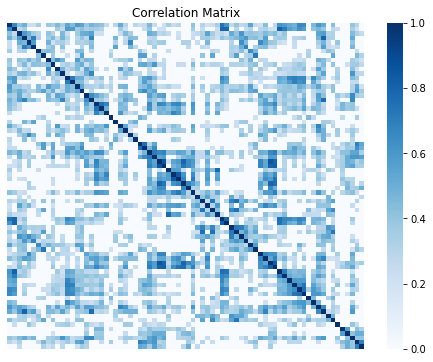

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_confusion_matrix(confusion_matrix, labels):
    fig, ax = plt.subplots(figsize=(8, 6))
    sns.heatmap(confusion_matrix, annot=False, fmt="f", cmap="Blues", cbar=True,
                xticklabels=labels, yticklabels=labels)
#     ax.set_xlabel('Predicted')
#     ax.set_ylabel('True')
    ax.set_title('Correlation Matrix')
    plt.show()
    
CM=average_connectivity_matrix[0]
CM [CM <0.2 ] = 0
plot_confusion_matrix(CM,[])

In [17]:
import numpy as np

# array=np.array([1,2,0,4,0])
def del_All_ocuuence(array, item):
    itemindex = np.where(array==item)
    A= np.delete(array,itemindex)
    return A

CM1= np.triu(CM)
# CM2=del_All_ocuuence(CM1,0)


In [1]:
# OK link for Nifti Maskers
# https://www.programcreek.com/python/example/110805/nilearn.input_data.NiftiMasker

# NotebookApp.iopub_data_rate_limit=100000000
# jupyter notebook --NotebookApp.iopub_data_rate_limit=1e10
# print(NotebookApp.iopub_data_rate_limit)

import numpy as np
from scipy import stats
res = stats.pearsonr([1, 2, 3, 4, 5], [1, 2.5, 3, 4, 5])
res


(0.9904434667711053, 0.0011198526620164759)

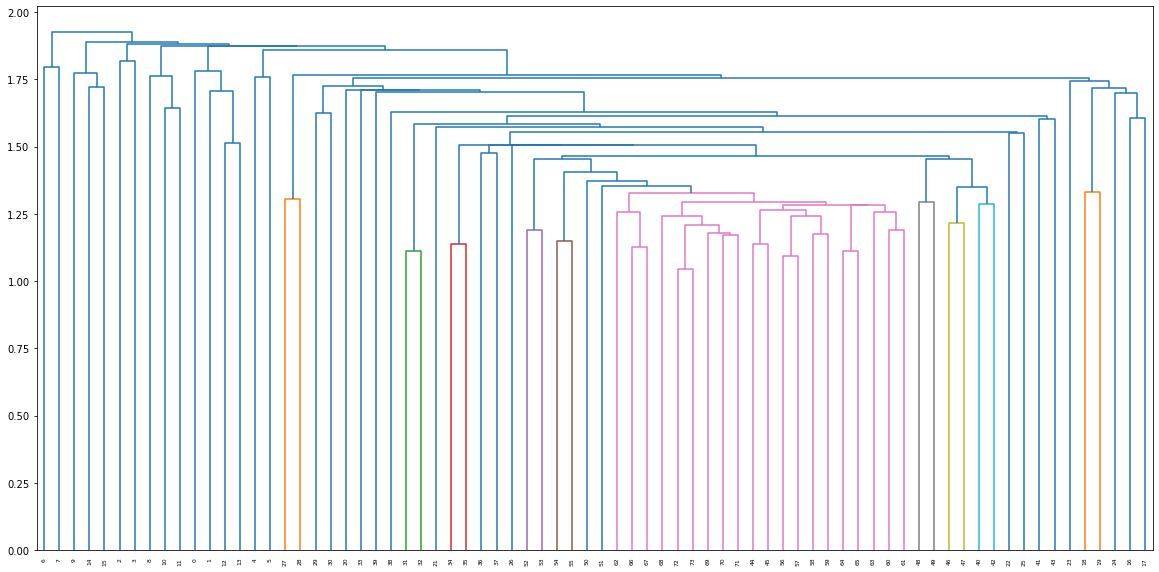

In [19]:
import numpy as np
from scipy.cluster import hierarchy
import matplotlib.pyplot as plt

ytdist = np.array(CM1)
#     [662., 877., 255., 412., 996., 295., 468., 268.,
#                    400., 754., 564., 138., 219., 869., 669.])
Y=ytdist #np.reshape(ytdist, (len(ytdist), 1))
Z = hierarchy.linkage(Y, 'single')
plt.figure(figsize=(20,10))
dn = hierarchy.dendrogram(Z)

In [ ]:
# from nltools.stats import zscore, fisher_r_to_z, fisher_z_to_r
# from nltools.data import Brain_Data, Design_Matrix, Adjacency
# import networkx as nx
# import ntpath

# connectivity_matrices = np.array(ARR_CM)
# average_connectivity_matrix = np.mean(connectivity_matrices, axis=0)
# CM=average_connectivity_matrix
# fig, ax = plt.subplots()
# print('CM shape- of ',i,'-',CM.shape)
# im = ax.imshow(CM[0], cmap='viridis', aspect='equal', interpolation='none')
# ax.set_title('Av Conn Matrix for all Sub')
# # i=i+1
# fig.colorbar(im,ax=ax, orientation='vertical')

In [ ]:
from nltools.stats import zscore, fisher_r_to_z, fisher_z_to_r
from nltools.data import Brain_Data, Design_Matrix, Adjacency
import networkx as nx
import ntpath


def path_leaf(path):
    head, tail = ntpath.split(path)
    return tail or ntpath.basename(head)


# L=[2,4,5]
# i=0

# CM=ARR_CM[0]
# sns.heatmap(np.abs(CM[0]), cmap='viridis')
i=0
for CM in ARR_CM:
    
#     sns.heatmap(np.abs(CM[0]), cmap='viridis')
    fig, ax = plt.subplots()
    print('CM shape- of ',i,'-',CM.shape)
    im = ax.imshow(CM[0], cmap='viridis', aspect='equal', interpolation='none')
    ax.set_title('Conn Matrix for Sub. no. '+ str(i+1)+' of id= '+ path_leaf(ListNames[i])[0:8] ) #sample_str[ 0 : N ]
    i=i+1
    fig.colorbar(im,ax=ax, orientation='vertical')
    
    
    
#     ZCM=fisher_z_to_r(CM[0])
# #         fisher_r_to_z(CM[0])
#     sns.heatmap(ZCM, cmap='viridis') #'RdBu_r')
#     im = ax.imshow(ZCM, cmap='viridis', aspect='equal', interpolation='none')
#     ax.set_title('Z Matrix for Sub 00'+ str(L[i]) )
#     fig.colorbar(im,ax=ax, orientation='vertical')


# roi_corr=CM[0]
# a = Adjacency(roi_corr, matrix_type='similarity', labels=[x for x in range(No_ROI)])
# a_thresholded = a.threshold(upper=.6, binarize=True)

# a_thresholded.plot()


# plt.figure(figsize=(20,15))
# G = a_thresholded.to_graph()
# pos = nx.kamada_kawai_layout(G)
# node_and_degree = G.degree()
# nx.draw_networkx_edges(G, pos, width=3, alpha=.2)
# nx.draw_networkx_labels(G, pos, font_size=14, font_color='darkslategray')

# nx.draw_networkx_nodes(G, pos, nodelist=list(dict(node_and_degree).keys()),
#                        node_size=[x[1]*100 for x in node_and_degree],
#                        node_color=list(dict(node_and_degree).values()),
#                        cmap=plt.cm.Reds_r, linewidths=2, edgecolors='darkslategray', alpha=1)




In [ ]:
import numpy as np
from scipy import stats

print('ARR_CM', len(ARR_CM))
Sub0=ARR_CM[0][0]
print('Subj 0 size=', Sub0.shape)
for i in range(0,10):
    print('i=',i,'-', Sub0[0][i])

# print(Sub0)
#-----------------------------------------------------
Sub0_Sigs=PO_Arr_Signals[0]
print('Sub0_Sigs=', Sub0_Sigs.shape)
for i in range(0,10):
    S0R0=Sub0_Sigs[:,0]
    S0R1=Sub0_Sigs[:,i]

# print('S0R0 =', S0R0.shape)
    res = stats.pearsonr(S0R0, S0R1)
    print('r-value of ', i,'= ', res[0])
# --------------------------------------------------------
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(15, 5))
ax = fig.add_subplot(111)

# label_idx=0
# ax.plot(signals[:, label_idx], linewidth=2, label=other_labels[label_idx + 1])

# for label_idx in range(0):
ax.plot(
    S0R0, linewidth=2 #label=other_labels[label_idx + 1]
    )  # 0 is background
ax.plot(
    S0R1, linewidth=2 #label=other_labels[label_idx + 1]
    ) 
ax.legend(loc=2)
ax.set_title("Signals for Two regions--- r-value="+str(res[0]))
plt.show()


In [ ]:


Shafer17_labels=['1_ContA','2_ContB','3_ContC','4_DefaultA','5_DefaultB','6_DefaultC','7_DorsAttnA','8_DorsAttnB',
                 '9_LimbicA','10_LimbicB','11_SalVentAttnA', '12_SalVentAttnB','13_SomMotA','14_SomMotB',
                 '15_TempPar_','16_VisCent','17_VisPeri']
power_labels=['1_Sensory/somatomotor','2_Ventral attention','3_Cingulo-opercular Task Control','4_Auditory','5_Default mode',
              '6_Dorsal attention','7_Visual','8_Fronto-parietal Task Control', '9_Salience','10_Subcortical']

#     ========================================================

def Compute_Person_R_Value_of_2_Signals(SigAtls1, SigAtls2, Atls_Sz1, Atls_Sz2):
    rows, cols = (Atls_Sz1, Atls_Sz2) #(10, 17)
    arr =np.zeros((rows, cols))
    
    for i in range(1,Atls_Sz1+1):
        for j in range(1,Atls_Sz2+1):
            S1=SigAtls1[:,i-1]
            S2=SigAtls2[:,j-1]

            res = stats.pearsonr(S1, S2)
            arr[i-1][j-1]= res[0]
            print('r-value of power region', power_labels[i-1],'+ shafer region ',Shafer17_labels[j-1],'=', res[0])
        
        
    return arr



Sub0_pow_Sigs=PO_Arr_Signals[0]
Sub0_sha_Sigs=SH_Arr_Signals[0]

print('Sub0_pow Sigs=', Sub0_pow_Sigs.shape)
print('Sub0_sha Sigs=', Sub0_sha_Sigs.shape)

Arr=Compute_Person_R_Value_of_2_Signals(Sub0_pow_Sigs,Sub0_sha_Sigs, 10,17)

Sub1_pow_Sigs=PO_Arr_Signals[1]
Sub1_sha_Sigs=SH_Arr_Signals[1]
Arr2=Compute_Person_R_Value_of_2_Signals(Sub1_pow_Sigs,Sub1_sha_Sigs, 10,17)
# print('S0R0 =', S0R0.shape)
        
    
    

In [ ]:
import seaborn as sn
import matplotlib.pyplot as plt

def Display_HeatMap(arr, LabList1, LabList2, Xlabel,Ylabel, Sub):
    cm=arr
    plt.figure(figsize = (15,15))
    x_axis_labels=LabList1 #Shafer17_labels
    y_axis_labels=LabList2 #power_labels

# sns.heatmap(flights_df, xticklabels=x_axis_labels, yticklabels=y_axis_labels)
    sn.heatmap(cm, annot=True,cmap='GnBu', xticklabels=x_axis_labels, yticklabels=y_axis_labels) 
    # cmap=''BuGn'',YlGnBu, YlOrRd, YlOrBr, Purples, PuRd, RdPu, GnBu
    plt.xlabel(Xlabel)
    plt.ylabel(Ylabel)
    plt.title("R-Value for Signals of "+ Xlabel +" and "+  Ylabel+ " Regions of ADHD "+ Sub)



power_labels=['1_Sensory/somatomotor','2_Ventral attention','3_Cingulo-opercular Task Control','4_Auditory','5_Default mode',
              '6_Dorsal attention','7_Visual','8_Fronto-parietal Task Control', '9_Salience','10_Subcortical']
Shafer17_labels=['1_ContA','2_ContB','3_ContC','4_DefaultA','5_DefaultB','6_DefaultC','7_DorsAttnA','8_DorsAttnB',
                 '9_LimbicA','10_LimbicB','11_SalVentAttnA', '12_SalVentAttnB','13_SomMotA','14_SomMotB',
                 '15_TempPar_','16_VisCent','17_VisPeri']
Display_HeatMap(Arr, Shafer17_labels, power_labels, "Shafer","Power", "Subject 1")

Display_HeatMap(Arr2, Shafer17_labels, power_labels, "Shafer","Power", "Subject 2")

In [ ]:
Display_HeatMap(arr, Shafer17_labels, power_labels, "Shafer","Power", "Subject 1")

In [ ]:
# import numpy as np
# import nibabel as nib
# from nilearn.image import resample_to_img

# def dice_coef(img1_path, img2_path, label):
#     """
#     Computes the Dice coefficient metric between two binary images 
#     (img1 and img2) for a specific label value.
    
#     Parameters:
#     ----------
#     img1_path : str
#         Path to the first image file (in NIfTI format).
#     img2_path : str
#         Path to the second image file (in NIfTI format).
#     label : int
#         Label value of interest.
        
#     Returns:
#     -------
#     dice : float
#         The Dice coefficient metric.
#     """
#     # Load images using nibabel
#     img1 = nib.load(img1_path)
#     img2 = nib.load(img2_path)
    
#     img3=resample_to_img(img1, img2)
#     img1=img3
    
#     # Get data arrays and flatten them
#     img1_data = img1.get_fdata().flatten()
#     img2_data = img2.get_fdata().flatten()
    
#     # Compute the intersection and union of the two binary images for the label of interest
#     intersection = np.sum((img1_data == label) & (img2_data == label))
#     union = np.sum((img1_data == label) | (img2_data == label))
    
#     # Compute the Dice coefficient
#     dice = 2 * intersection / (union + intersection)
    
#     return dice

# atlas1='data4test/Yeo2011_17Networks_N1000.split_components.FSL_MNI152_1mm.nii.gz'
# atlas2='data4test/power264MNI.nii.gz'


# dice_score = dice_coef(atlas1, atlas2, 1)
# print(f"Dice coefficient for label 1: {dice_score}")



In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix

def dice_coefficient(image1, image2):
    """
    Calculates the Dice coefficient metric for two binary images.
    
    Parameters:
    image1 (ndarray): A binary image.
    image2 (ndarray): Another binary image of the same size as `image1`.
    
    Returns:
    dice_coeff (float): The Dice coefficient metric.
    """
    intersection = np.sum(image1 * image2)
    union = np.sum(image1) + np.sum(image2)
    dice_coeff = (2 * intersection) / union
    return dice_coeff

def generate_confusion_matrix(image1, image2, labels):
    """
    Generates a confusion matrix for two binary images based on their labels.
    
    Parameters:
    image1 (ndarray): A binary image.
    image2 (ndarray): Another binary image of the same size as `image1`.
    labels (list): A list of labels for each region of interest (ROI).
    
    Returns:
    conf_mat (ndarray): The confusion matrix.
    """
    num_labels = len(labels)
    conf_mat = np.zeros((num_labels, num_labels))
    for i, label1 in enumerate(labels):
        for j, label2 in enumerate(labels):
            roi1 = np.where(image1 == label1, 1, 0)
            roi2 = np.where(image2 == label2, 1, 0)
            dice = dice_coefficient(roi1, roi2)
            conf_mat[i, j] = dice
    return conf_mat

# Example usage
atlas1='data4test/Yeo2011_17Networks_N1000.split_components.FSL_MNI152_1mm.nii.gz'
atlas2='data4test/power264MNI.nii.gz'

image1 = nib.load(atlas1) #np.array([[1, 1, 2], [2, 2, 2], [2, 2, 3]])
image2 = nib.load(atlas2) #np.array([[1, 1, 1], [2, 2, 3], [3, 3, 3]])

image1=resample_to_img(image1, image2)

image1 = image1.get_fdata().flatten() 
image2 = image2.get_fdata().flatten()

labels = []
for i in range(1,50):
    labels.append(i)
conf_mat = generate_confusion_matrix(image1, image2, labels)
print(conf_mat)


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

def Draw_ConfMatrix(cf_matrix):
   

    fig, ax = plt.subplots(figsize=(10,10))         # Sample figsize in inches
    sns.heatmap(cf_matrix, annot=False, linewidths=.5, ax=ax,cmap='Reds')
#     ax = sns.heatmap(cf_matrix, annot=True, cmap='Reds') #Blues

    ax.set_title('dice_coefficient of two Atlases\n');
    ax.set_xlabel('\n ROIs of Yeo Atlas')
    ax.set_ylabel('ROIs of Power Atlas ');

## Ticket labels - List must be in alphabetical order
# ax.xaxis.set_ticklabels(['False','True'])
# ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
    plt.show()
    
Draw_ConfMatrix(conf_mat)

In [ ]:
# np.array_equal(
#     valid_regions_signal,
#     cleaned_and_averaged_time_series
# )

In [ ]:
# function [fmri, vol, vol_size] = read_fmri(fmri_name)

# % [fmri, vol] = read_fmri(fmri_name)
# % Given the name of functional MRI file (fmri_name), this function read in
# % the fmri structure and the content of signals (vol).
# % 
# % Input:
# %     - fmri_name:
# %       The full path of input file name.
# %
# % Output:
# %     - fmri:
# %       The structure read in by MRIread() or ft_read_cifti(). To save
# %       the memory, fmri.vol (for NIFTI) or fmri.dtseries (for CIFTI) is
# %       set to be empty after it is transfered to "vol".
# %
# %     - vol:
# %       A num_voxels x num_timepoints matrix which is the content of
# %       fmri.vol (for NIFTI) or fmri.dtseries (for CIFTI) after reshape.
# %
# %     - vol_size:
# %       The size of fmri.vol (NIFTI) or fmri.dtseries (CIFTI).

# if (isempty(strfind(fmri_name, '.dtseries.nii')))
#     % if input file is NIFTI file
#     fmri = MRIread(fmri_name);
#     vol = single(fmri.vol);
#     vol_size = size(vol);
#     vol = reshape(vol, prod(vol_size(1:3)), prod(vol_size)/prod(vol_size(1:3)));
#     fmri.vol = [];
# else
#     % if input file is CIFTI file
#     fmri = ft_read_cifti(fmri_name);
#     vol = single(fmri.dtseries);
#     vol_size = size(vol);
#     fmri.dtseries = [];
# end


# end


In [ ]:
# !pip install easywebdav

In [ ]:
# import easywebdav

# webdav = easywebdav.connect(host='drive.corp.amazon.com', 
#                             username='username', 
#                             port=443, 
#                             protocol='https', 
#                             password='password')

# print(webdav.ls())

In [ ]:
import nibabel as nib
import nilearn.datasets as datasets

# Load the Yeo 2011 atlas
yeo = datasets.fetch_atlas_yeo_2011()
yeo17_data = nib.load(yeo['thick_17']).get_fdata()


# Load the other atlas (replace 'other_atlas.nii.gz' with the path to your atlas file)
power_atlas = nib.load('data4test/power264MNI.nii.gz')
power_data=power_atlas.get_fdata()

In [ ]:
def DrawRoIs(atlasFile,NLabel):
    atlas_img=nib.load(atlasFile)
    atlas_data = atlas_img.get_fdata()
    
    atlas_flat = atlas_data.flatten()
    atlas_flat=atlas_flat.astype(int)
    
    uniq_labels=np.unique(atlas_flat)
    no_of_labels=len(np.unique(atlas_flat))
    print('no_of_labels=',no_of_labels)
    print('uniqe labels =',uniq_labels)
    
    Filtered_Network=FilterRegion(atlas_flat,[NLabel])
    
    Filtered_data = Filtered_Network.reshape(atlas_data.shape)
#     atlas_data = atlas_data.astype(int)
#     this_data = (atlas_data == NLabel)
    
#     this_img = new_img_like(atlas_img, Filtered_data, affine)
    this_img =nib.Nifti1Image(Filtered_data,  atlas_img.affine, header=atlas_img.header)
    plotting.plot_roi(this_img, cmap='winter', title='Yeo Atlas Region '+str(NLabel)) # cut_coords=coords,cut_coords=(2,-75,3),
#=========================================================================================================
def DrawNoIs(atlasFile,LabNo,NLabel,RegionDic):
    atlas_img=nib.load(atlasFile)
    atlas_data = atlas_img.get_fdata()
    
    atlas_flat = atlas_data.flatten()
    atlas_flat=atlas_flat.astype(int)
    
    uniq_labels=np.unique(atlas_flat)
    no_of_labels=len(np.unique(atlas_flat))
    print('no_of_labels=',no_of_labels)
    print('uniqe labels =',uniq_labels)
    
    Filtered_Network=FilterRegion(atlas_flat,NLabel)
    
    Filtered_data = Filtered_Network.reshape(atlas_data.shape)
#     atlas_data = atlas_data.astype(int)
#     this_data = (atlas_data == NLabel)
    
#     this_img = new_img_like(atlas_img, Filtered_data, affine)
    this_img =nib.Nifti1Image(Filtered_data,  atlas_img.affine, header=atlas_img.header)
    plotting.plot_roi(this_img, cmap='brg', title='Power Atlas Network '+str(LabNo)+' '+ RegionDic[0]) # cut_coords=coords,cut_coords=(2,-75,3),

##------------------------------------------------------------------------   
